<h1>Constructing K-Means Algorithm From Scratch</h1>
<h4><font color = gray>Part 2: Iterating until there is no way to make the clustering any better</h4><font color = black>
<code>by Marc Arvie V. Talavera</code>

This notebook is the continuation of k-mean clustering from scratch by optimizing the total distances of the data points to their corresponding centroids.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Try to generate data
dist1 = np.random.multivariate_normal([1, 2], [[1, 0], [0, 1]], 500)
dist2 = np.random.multivariate_normal([5, 7], [[2, 0], [0, 5]], 500)

# Append the data in one array
data = []
for i in dist1:
  data.append(i)
for i in dist2:
  data.append(i)

# Transform into an array
data = np.array(data)

We will continue with the code for k-mean where we modify some of the parameters so that we want to optimize the distances of the data points to their corresponding centroids, and stop when there is convergence or the cluster cannot get any better. We will also use the same method of generating the dataset from the first part.

In [25]:
# Time to perform the algorithm

# Set the number of clusters
k = 2

# Select k random points on the dataset
indices = np.random.choice(range(0, data.shape[0]), k)

# Initialize the centroids
centroids = np.zeros((k, data.shape[1]))
centroids[:] = np.array([data[i] for i in indices])

# Create array for assigning kth cluster for each data point
assignment = np.zeros(data.shape[0])

# Initialize zeroth iteration
iter = 0

# Initialize fitness value to be zero since squared difference will just be
# the first fitness value
fit1 = 0

# Define squared difference; make it one as to satisfy the while loop
# for the first iteration
diff_squared = 1

# Define Euclidean distance
def dist(array1, array2):
  dist_vector = array1 - array2
  dist_squared = np.dot(dist_vector, dist_vector)
  return np.sqrt(dist_squared)
  
# Start iterations
while diff_squared > 0:
  # For calculating efficiency
  efficiency_holder = np.zeros(k)

  # Calculate distances
  for index1, (point) in enumerate(data):
    distances = np.zeros(k)
    for index2, (centroid) in enumerate(centroids):
      distances[index2] = dist(point, centroid)
    
    # Determine which cluster is closest to the point
    argmin = np.argmin(distances)
    # Assign cluster
    assignment[index1] = argmin
    # Add distances of points belonging to same cluster
    efficiency_holder[argmin] += distances[argmin]**2

  # After assigning values, group them into clusters to get new centroid
  for cluster in range(0, k):
    # Determine indices of points belonging to a cluster
    cluster_indices = np.argwhere(assignment == cluster).ravel()
    cluster_group = data[cluster_indices]

    # Determine centroid of this cluster group
    centroids[cluster] = np.sum(cluster_group, axis = 0) / len(cluster_group)

  # Record efficiency for the given iteration
  fit2 = np.sum(efficiency_holder)

  # Squared of difference between present and past consecutive fitnesses
  diff_squared = (fit2 - fit1)**2

  # Update fit1 so that it fit 2 for this loop is fit1 in the next iteration
  fit1 = fit2

  # Update iter values to be used to determine number of iterations used
  iter += 1

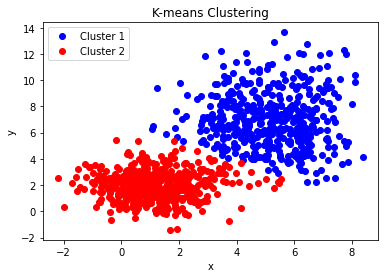

The number of iterations is 5.


In [30]:
# Plot the result
# Cluster 1
cluster_1 = data[np.argwhere(assignment == 0).ravel()]
# Cluster 2
cluster_2 = data[np.argwhere(assignment == 1).ravel()]

# Plot
fig = plt.plot(figsize = (15, 5))
# Cluster 1 plot
plt.plot(cluster_1[:, 0], cluster_1[:, 1], "bo", label = "Cluster 1")
# Cluster 2 plot
plt.plot(cluster_2[:, 0], cluster_2[:, 1], "ro", label = "Cluster 2")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-means Clustering")
plt.legend()
plt.show()

print("The number of iterations is {}.".format(iter))

<h2>Conclusion</h2>

In this notebook, we tried to iterate the algorithm until the difference between the current and previous fitness functions becomes zero. We see that the number of iterations is much less, and we are still able to cluster the dataset effectively. The caveat is, the plot of fitness values versus the number of iterations may have a convergence within some range of values, then eventually goes down beyond that. However, this could be impossible to happen to this algorithm (<b><font color = red>to be verified</b><font color = black>) because this is not a stochastic one like genetic algorithm. It is recommended to create a module or package to simplify running this algorithm, and giving the user freedom to choose whether to supply the number of iterations of not.